In [1]:
%pylab inline
from app.analysis import Quote
corporate = Quote.screen_funds('Bonds', 'Domestic', 'Corporate', 'Investment Grade')
municipal = Quote.screen_funds('Bonds', 'Domestic', 'Municipal')
multiassets = Quote.screen_funds('Bonds', 'Domestic', 'MultiAssets (Bond Funds)', 'Long-Term')
multiassets += ['BIV', 'AGG', 'BND', 'SCHZ']
print(len(corporate), len(municipal), len(multiassets))
quote = Quote(corporate + municipal + multiassets, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
5 9 8
from 2019-01-31 to 2019-07-31 - 22


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[(stats['shrp'] > 0) & (stats['mean'] > 0.04)]
print(len(stats))
stats.sort_values('mean', ascending=False)

20


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
VCLT,122,0.094638,0.176170,0.492145,12.342832,2.439522
IGLB,122,0.093423,0.173228,0.493492,12.235700,2.345816
BLV,122,0.086498,0.189326,0.414954,11.257747,2.488783
LQD,122,0.068287,0.120373,0.501362,8.668015,1.584890
BAB,122,0.063517,0.116564,0.476826,8.050109,1.234570
IGIB,122,0.061606,0.081723,0.656724,7.812629,0.928682
VCIT,122,0.060908,0.087478,0.605535,7.486766,0.988888
USIG,122,0.058568,0.092536,0.547153,7.418770,1.170711
BIV,122,0.050733,0.090593,0.472402,6.278565,0.980390


evicted BAB 0.771 0.702
evicted IGIB 0.554 0.495
retry backlogs ['AGG', 'BIV', 'BLV', 'SCHZ', 'BND', 'LQD', 'USIG', 'PZA', 'SPIB', 'VCIT', 'MUB', 'IGLB', 'VCLT', 'TFI', 'CMF', 'VTEB'] at 0.905/-0.51 - 0.873
evicted TFI 0.901 0.524
evicted VCIT 0.573 0.527
retry backlogs ['AGG', 'BIV', 'PZA', 'SCHZ', 'MUB', 'BLV', 'BND', 'USIG', 'LQD', 'IGLB', 'VCLT', 'CMF', 'SPIB', 'VTEB'] at 0.910/-0.52 - 0.873
evicted VCLT 0.875 0.416
evicted SPIB 0.584 0.539
retry backlogs ['AGG', 'PZA', 'MUB', 'SCHZ', 'BIV', 'BLV', 'BND', 'USIG', 'IGLB', 'LQD', 'CMF', 'VTEB'] at 0.915/-0.53 - 0.873
evicted PZA 0.913 0.436
evicted CMF 0.912 0.488
evicted LQD 0.522 0.435
retry backlogs ['AGG', 'MUB', 'BLV', 'BND', 'SCHZ', 'BIV', 'USIG', 'IGLB', 'VTEB'] at 0.920/-0.54 - 0.873
evicted USIG 0.594 0.519
retry backlogs ['AGG', 'MUB', 'BLV', 'BND', 'SCHZ', 'BIV', 'IGLB', 'VTEB'] at 0.925/-0.55 - 0.873
evicted BIV 0.840 0.664
evicted IGLB 0.533 0.451
retry backlogs ['AGG', 'BLV', 'BND', 'SCHZ', 'MUB', 'VTEB'] at 0.930/-0.56

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.047999,0.045904,-0.070395,0.021618,0.039955,0.073780,0.184844,0.872747,6.030595,0.348857
HYD,122.0,0.047514,0.046462,-0.066275,0.019333,0.041309,0.068739,0.185648,0.851822,6.007156,0.409065
ITM,122.0,0.048295,0.049519,-0.087918,0.019675,0.041694,0.077674,0.193911,0.814999,6.044779,0.438741


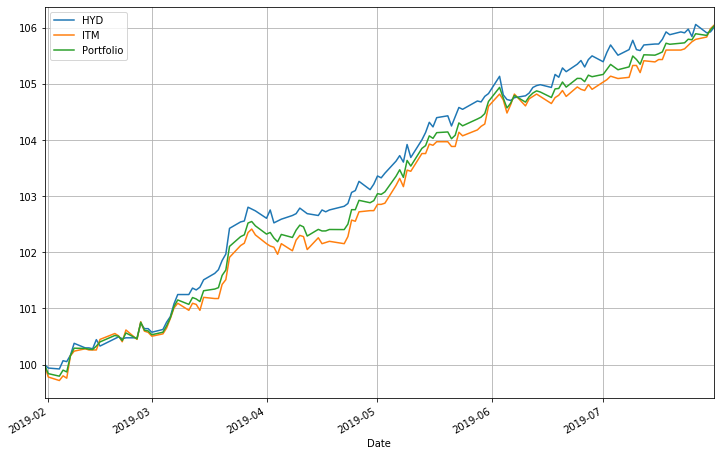

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['HYD', 'VTEB'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['HYD', 'VTEB'])
quote.graph({'HYD': 0.64, 'VTEB': 0.36})